In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

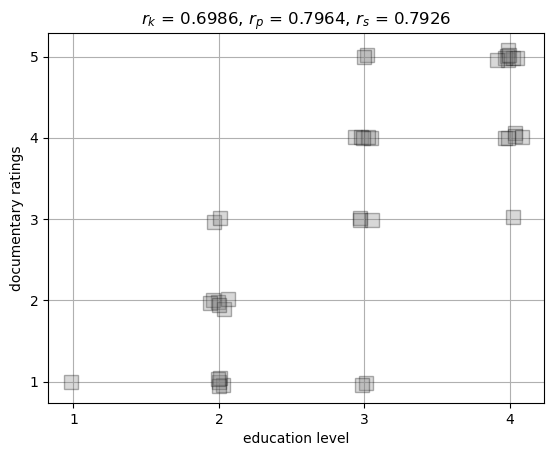

In [33]:
N = 40

docu_ratings = np.random.randint(low=1, high=6, size=N)

edu_level = np.ceil((docu_ratings + np.random.randint(1, 5, N)) / 9 * 4)

cr = [0, 0, 0]
cr[0] = stats.kendalltau(edu_level, docu_ratings)[0]
cr[1] = stats.pearsonr(edu_level, docu_ratings)[0]
cr[2] = stats.spearmanr(edu_level, docu_ratings)[0]

cr = np.round(cr, 4)

plt.plot(edu_level + np.random.randn(N) / 30, docu_ratings + np.random.randn(N) / 30, 'ks', markersize=10, markerfacecolor='grey', alpha=0.3)
plt.xticks(np.arange(1, 5))
plt.yticks(np.arange(1, 6))
plt.xlabel('education level')
plt.ylabel('documentary ratings')
plt.grid()
plt.title(f'$r_k$ = {cr[0]}, $r_p$ = {cr[1]}, $r_s$ = {cr[2]}')

plt.show()

In [73]:
num_exprs = 1000
n_values = 50
n_categories = 6

c = np.zeros((num_exprs, 3))

for i in range(num_exprs):
    
    x = np.random.randint(0, n_categories, n_values)
    y = np.random.randint(0, n_categories, n_values)
    
    c[i] = [stats.kendalltau(x, y)[0], stats.pearsonr(x, y)[0], stats.spearmanr(x, y)[0]]

print(c)

[[-0.01284691 -0.01675026 -0.01214375]
 [ 0.08539666  0.09849615  0.11011932]
 [ 0.11030697  0.13913929  0.14139285]
 ...
 [ 0.09970679  0.13999844  0.12816943]
 [ 0.0961632   0.10865164  0.11221679]
 [ 0.01937985  0.05677457  0.01955342]]


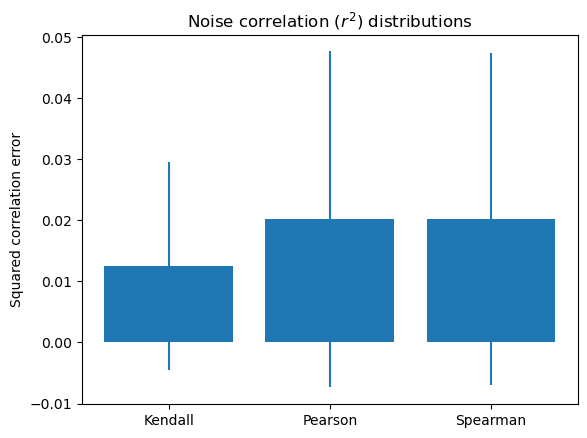

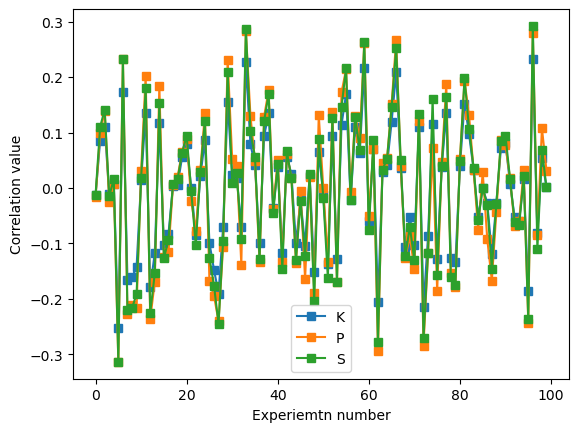

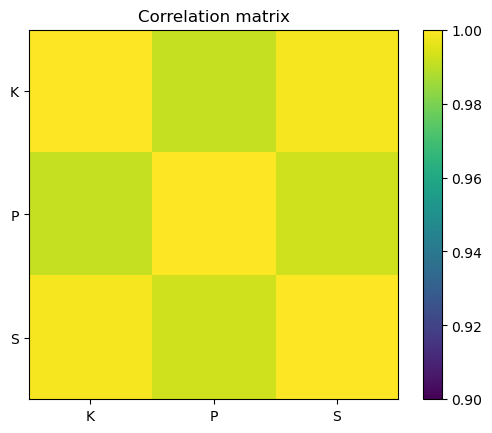

In [75]:
plt.bar(range(3), np.mean(c ** 2, axis=0))
plt.errorbar(range(3), np.mean(c ** 2, axis=0), np.std(c ** 2, ddof=1, axis=0), linestyle='')
plt.xticks(range(3), ['Kendall', 'Pearson', 'Spearman'])
plt.ylabel('Squared correlation error')
plt.title('Noise correlation ($r^2$) distributions')

plt.show()

plt.plot(c[:100], 's-')
plt.xlabel('Experiemtn number')
plt.ylabel('Correlation value')
plt.legend(['K', 'P', 'S'])

plt.show()

plt.imshow(np.corrcoef(c.T), vmin=0.9, vmax=1)
plt.colorbar()
plt.xticks(range(3), ['K', 'P', 'S'])
plt.yticks(range(3), ['K', 'P', 'S'])
plt.title('Correlation matrix')

plt.show()

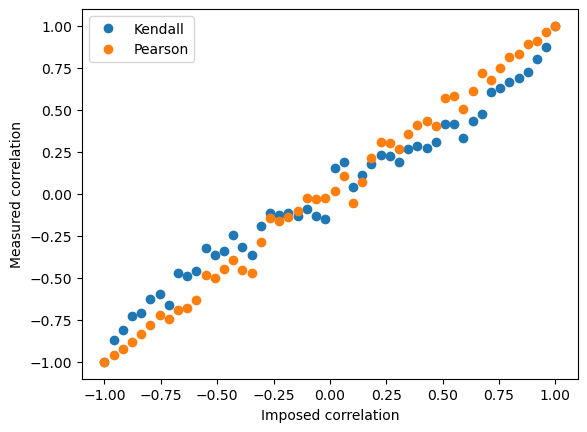

In [173]:
n_corr = 50
n_values = 200
n_categories = 6
correlations = np.linspace(-1, 1, n_corr)
corr_k_p = np.ones((n_corr, 2))

for i, corr in enumerate(correlations):
    
    x = np.random.randint(0, n_categories, n_values)
    y = np.random.randint(0, n_categories, n_values)
    
    y = x * corr + y * np.sqrt(1 - corr ** 2)
    
    corr_k_p[i] = [stats.kendalltau(x, y)[0], stats.pearsonr(x, y)[0]]
    
corr_k_p_means = np.mean(corr_k_p, axis=0)

plt.plot(correlations, corr_k_p, 'o')
plt.xlabel('Imposed correlation')
plt.ylabel('Measured correlation')
x_lim = plt.xlim()
plt.legend(['Kendall', 'Pearson'])

plt.show()